# Data Visualization Project 
# Team: Skyline Society

## Customer ask 

XYZ Corporation uses data to develop marketing profiles on people. These profiles are then sold to numerous companies for marketing purposes. You work at XYZ as part of a team of data analysts. Your team has just been given a new project working with UVW College, a local college looking to bolster enrollment. UVW has chosen a salary as a key demographic to determine criteria for marketing its degree programs. You must develop marketing profiles using data supplied by the United States Census Bureau, and you will be focusing on \\$50,000 as a key number for salary. There are many key variables that must be assessed for individuals making less than and more than \\$50,000, including age, gender, education status, marital status, occupation, etc.

For example, if the data show that the majority of individuals making less than \\$50,000 is under 34 years old, male, single, and has a high school diploma, the college can market to this demographic with tuition amounts, program concentrations, and even ground or online programs appropriate to this demographic.

To achieve its enrollment target, the marketing team at UVW would like to develop an application to find the factors that determine the individual's income. One way to accomplish this is to use the United States Census Bureau data provided by the XYZ company. The marketing team wants to group the factors that can be used in the development of their proposed model/application. They also want the application to predict the income of an individual based on different values of the input parameters so that they can tailor their marketing efforts when reaching out to the individuals.

## Project Description

You will use the following dataset to complete the project:

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Description of the column names: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

We recommend that you get an early start on the team project. As a team, review the customer ask so you can understand what is expected and divide the work among team members.

## Team members 
Benjamin Parrish, Eric Yu, Min Xu, Neelima Barji, Ryan Berg



In [21]:
# Import libraries and reading data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("adult.data", index_col=False)
colNames = ["age", "workclass", "fnlwgt", "education", "educationNum", "maritalStatus", \
            "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", \
            "hoursPerWeek", "nativeCountry", "amount"]
df.columns = colNames
# Note the first row of adult.test has been removed manually
dfTest = pd.read_csv("adult.test", index_col=False)
dfTest.columns = colNames

In [22]:
# Data filtering and cleaning

df['income'] = df['amount'].apply(lambda x: 0 if str(x) == " <=50K" else (1 if str(x) == ' >50K' else 2))
lenBefore = len(df)
df = df[df['income'] <= 1]
lenAfter = len(df)
if (lenBefore != lenAfter):
    print("Length before filtering is ", lenBefore, ". Length after filter is ", lenAfter)
df = df[~df['nativeCountry'].str.contains(" \?")]
df = df[~df['occupation'].str.contains(" \?")]
df = df[~df['workclass'].str.contains(" \?")]
lenAfter = len(df)

if (lenBefore != lenAfter):
    print("Total rows before filtering are ", lenBefore, ". Total rows after filtering are ", lenAfter)
    pass
df.drop(['fnlwgt', 'capital-gain', 'capital-loss'], axis=1, inplace=True)

# Add hours column
# hours per week (>40)=0 (=40)=1 (>40)=2
df['hours'] = df['hoursPerWeek'].apply(lambda x: 0 if x < 40 else (1 if x == 40 else 2))

df.head(10)

Total rows before filtering are  32560 . Total rows after filtering are  30161


age          workclass      education  educationNum  \
0   50   Self-emp-not-inc      Bachelors            13   
1   38            Private        HS-grad             9   
2   53            Private           11th             7   
3   28            Private      Bachelors            13   
4   37            Private        Masters            14   
5   49            Private            9th             5   
6   52   Self-emp-not-inc        HS-grad             9   
7   31            Private        Masters            14   
8   42            Private      Bachelors            13   
9   37            Private   Some-college            10   

            maritalStatus          occupation    relationship    race  \
0      Married-civ-spouse     Exec-managerial         Husband   White   
1                Divorced   Handlers-cleaners   Not-in-family   White   
2      Married-civ-spouse   Handlers-cleaners         Husband   Black   
3      Married-civ-spouse      Prof-specialty            Wife   Black   
4      Married-civ-spouse     Exec-managerial            Wife   White   
5   Married-spouse-absent       Other-service   Not-in-family   Black   
6      Married-civ-spouse     Exec-managerial         Husband   White   
7           Never-married      Prof-specialty   Not-in-family   White   
8      Married-civ-spouse     Exec-managerial         Husband   White   
9      Married-civ-spouse     Exec-managerial         Husband   Black   

       sex  hoursPerWeek   nativeCountry  amount  income  hours  
0     Male            13   United-States   <=50K       0      0  
1     Male            40   United-States   <=50K       0      1  
2     Male            40   United-States   <=50K       0      1  
3   Female            40            Cuba   <=50K       0      1  
4   Female            40   United-States   <=50K       0      1  
5   Female            16         Jamaica   <=50K       0      0  
6     Male            45   United-States    >50K       1      2  
7   Female            50   United-States    >50K       1      2  
8     Male            40   United-States    >50K       1      1  
9     Male            80   United-States    >50K       1      2

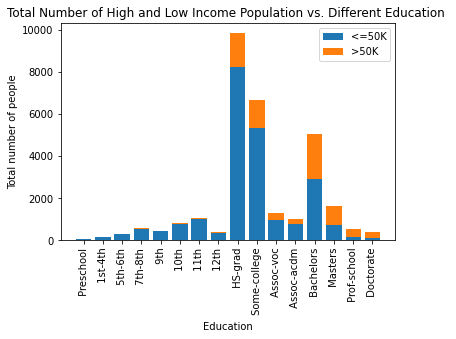

In [23]:
# Display the high income and low income number of people in each education group
ldf = df.groupby(['educationNum', 'education']).income.value_counts().unstack()
ldf = ldf.fillna(0)
ldf.reset_index(inplace=True)
xDf = pd.DataFrame
xDf = pd.DataFrame(ldf[0])
y = pd.DataFrame(ldf[1])
xDf['education'] = ldf['education']
xDf['count1'] = y[1]
xDf['count'] = xDf[0]
xDf.drop([0], axis=1, inplace=True)

xPos = np.arange(len(xDf['education']))
plt.bar(xDf['education'], xDf['count'])
plt.bar(xDf['education'], xDf['count1'], bottom=xDf['count'])
plt.ylabel('Total number of people')
plt.xlabel('Education')
plt.xticks(xPos, xDf['education'], rotation=90)
plt.legend(labels=['<=50K', '>50K'])
plt.title("Total Number of High and Low Income Population vs. Different Education ")
plt.show()


        education  count1   count  percentage
0       Preschool     0.0    45.0         0.0
1         1st-4th     6.0   145.0         4.0
2         5th-6th    12.0   276.0         4.2
3         7th-8th    35.0   522.0         6.3
4             9th    25.0   430.0         5.5
5            10th    59.0   761.0         7.2
6            11th    59.0   989.0         5.6
7            12th    29.0   348.0         7.7
8         HS-grad  1617.0  8223.0        16.4
9    Some-college  1336.0  5342.0        20.0
10      Assoc-voc   344.0   963.0        26.3
11     Assoc-acdm   256.0   752.0        25.4
12      Bachelors  2126.0  2917.0        42.2
13        Masters   918.0   709.0        56.4
14    Prof-school   406.0   136.0        74.9
15      Doctorate   280.0    95.0        74.7


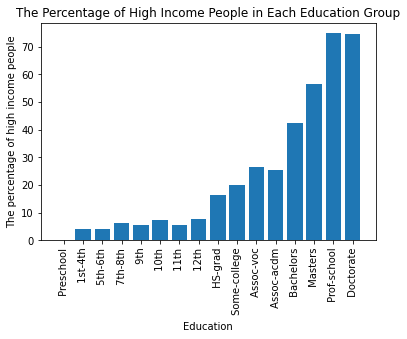

In [24]:
# Show the percentage of the high income people in each education group
lDf = xDf
lDf['percentage'] = round(lDf['count1'] / (lDf['count'] + lDf['count1']), 3)*100
print(lDf)
xPos = np.arange(len(lDf['education']))
plt.bar(lDf['education'], lDf['percentage'])
plt.ylabel('The percentage of high income people')
plt.xlabel('Education')
plt.xticks(xPos, lDf['education'], rotation=90)
plt.title("The Percentage of High Income People in Each Education Group")
plt.show()

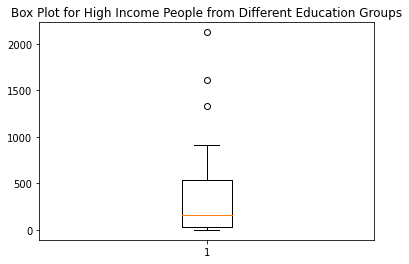

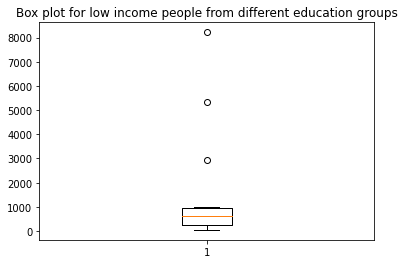

In [25]:
plt.boxplot(lDf['count1'])
plt.title('Box Plot for High Income People from Different Education Groups')
plt.show()
plt.boxplot(lDf['count'])
plt.title('Box plot for low income people from different education groups')
plt.show()

In [26]:
lDf['count1'].sort_values()

0        0.0
1        6.0
2       12.0
4       25.0
7       29.0
3       35.0
5       59.0
6       59.0
11     256.0
15     280.0
10     344.0
14     406.0
13     918.0
9     1336.0
8     1617.0
12    2126.0
Name: count1, dtype: float64

<AxesSubplot:title={'center':'Mean income of different marital status'}, xlabel='Marital Status', ylabel='Income (50K)'>

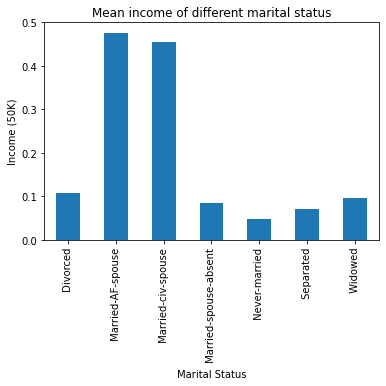

In [27]:
# Marital status mean income distribution figure
df.groupby('maritalStatus').income.mean().plot.bar(title='Mean income of different marital status', \
                                               xlabel='Marital Status', \
                                               ylabel='Income (50K)', \
                                               x='')

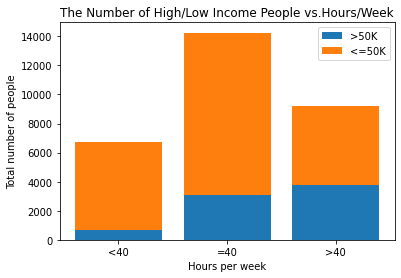

In [28]:
# hoursPerWeek vs. income distribution
dfHighIncome = df[df['income'] == 1]
dfLowIncome = df[df['income'] == 0]
hDf = dfHighIncome.groupby('hours').income.count().reset_index(name='count')
lDf = dfLowIncome.groupby('hours').income.count().reset_index(name='count')
hDf['count1'] = lDf['count']

xPos = np.arange(len(hDf['hours']))
plt.bar(hDf['hours'], hDf['count'])
plt.bar(hDf['hours'], hDf['count1'], bottom=hDf['count'])
plt.ylabel('Total number of people')
plt.xlabel('Hours per week')
plt.xticks(xPos, ['<40','=40','>40'])
plt.legend(labels=['>50K', '<=50K'])
plt.title('The Number of High/Low Income People vs.Hours/Week')
plt.show()

   hours  count  count1  percentage
0      0    657    6057         9.8
1      1   3110   11140        21.8
2      2   3741    5456        40.7


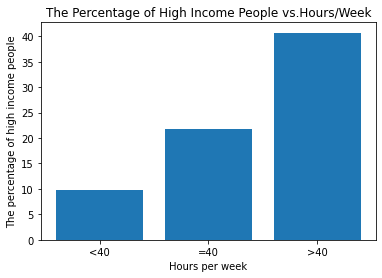

In [29]:
# Show the percentage of the high income people in each hour per week group

hDf['percentage'] = round(hDf['count'] / (hDf['count'] + hDf['count1']), 3)*100
print(hDf)
xPos = np.arange(len(hDf['hours']))
plt.bar(hDf['hours'], hDf['percentage'])
plt.ylabel('The percentage of high income people')
plt.xlabel('Hours per week')
plt.xticks(xPos, ['<40','=40','>40'])
plt.title('The Percentage of High Income People vs.Hours/Week')
plt.show()

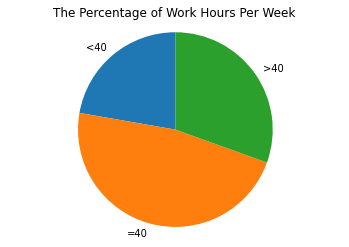

In [30]:
hDf['total'] = hDf['count'] + (hDf['count1'])
plt.pie(hDf['total'], 
        labels=['<40','=40','>40'], 
        startangle=90, 
        #autopct='%1.2f%%',
        #pctdistance=1.1, 
        #labeldistance=1.2,
        shadow=False)
plt.axis('equal')
plt.title('The Percentage of Work Hours Per Week')
plt.savefig("pics/hourPerWeekPieChart.jpg", dpi=150)
plt.show()